# Tesla (TSLA) Stock Price prediction using Facebook Prophet

## Importing all the necessary Libraries

In [16]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [17]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [18]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

## Importing the Dataset & Exploring it

In [19]:
financial_data = pd.read_csv('/content/TSLA.csv')

In [20]:
#read_csv function from pandas

In [21]:
financial_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-26,160.289993,160.669998,153.139999,153.750000,153.750000,153364100
1,2023-04-27,152.639999,160.479996,152.369995,160.190002,160.190002,127015200
2,2023-04-28,160.899994,165.000000,157.320007,164.309998,164.309998,122515800
3,2023-05-01,163.169998,163.279999,158.830002,161.830002,161.830002,109015000
4,2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700
...,...,...,...,...,...,...,...
248,2024-04-22,140.559998,144.440002,138.800003,142.050003,142.050003,107097600
249,2024-04-23,143.330002,147.259995,141.110001,144.679993,144.679993,124545100
250,2024-04-24,162.839996,167.970001,157.509995,162.130005,162.130005,181178000
251,2024-04-25,158.960007,170.880005,158.360001,170.179993,170.179993,125810700


In [22]:
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [23]:
financial_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,220.653597,224.858577,216.451620,220.795435,220.795435,1.174341e+08
std,37.515894,37.952589,36.876339,37.385684,37.385684,2.588997e+07
min,140.559998,144.440002,138.800003,142.050003,142.050003,5.671318e+07
25%,185.300003,188.889999,182.100006,185.770004,185.770004,1.013779e+08
50%,229.339996,235.229996,225.380005,231.279999,231.279999,1.127573e+08
75%,251.449997,257.970001,247.289993,252.539993,252.539993,1.312834e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,2.117971e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [24]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [25]:
px.area(financial_data, x='Date', y='Close')

In [26]:
px.line(financial_data, x='Date', y='Close')

In [27]:
px.area(financial_data, x='Date', y='Volume')

The reasons for the high transaction volumes of Tesla on:

* June 21st, 2023 was because Tesla returned to S&P 500 ECG index.
* January 25th, 2024 was because erased $80 bln. in valuation after Mask's sales warning.

In [28]:
px.bar(financial_data, y='Volume')

So on June 21 and Jan 2024 the transaction volumes of Tesla were 212 and 198 million shares respectively!

On average it is between 110,120 million shares.

In [29]:
px.box(financial_data, y='Close')

So as we see the median is $$231.The quartile 3 is $253. The maximum close price is $293 and the maximum high price is almost $300. The minumum close price is $142 for the last one year of historical data. Quartile 1 is $186.

# Understanding Facebook Prophet

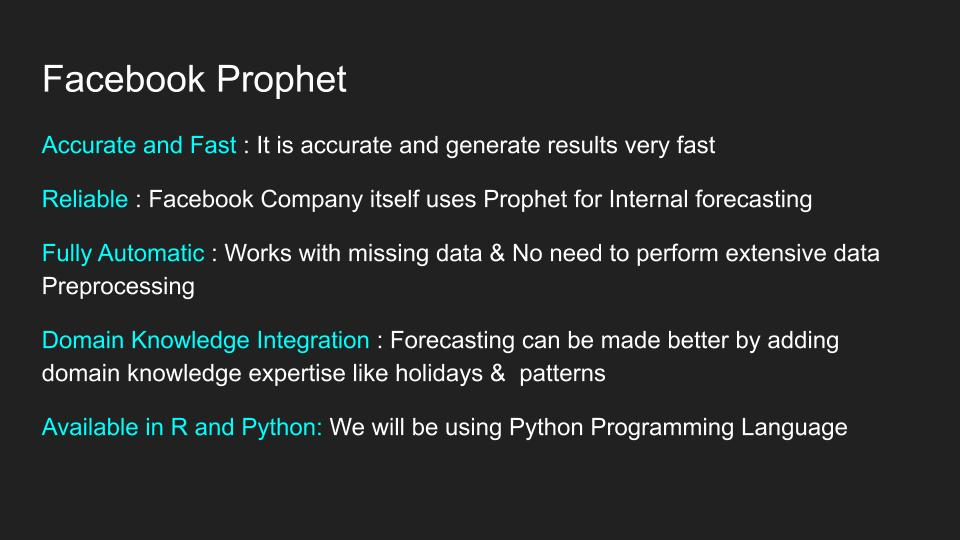

## Data Preperation

In [31]:
columns = ['Date', 'Close']
new_financial_data = pd.DataFrame(financial_data, columns=columns)

In [32]:
new_financial_data

,Date,Close
0,2023-04-26,153.750000
1,2023-04-27,160.190002
2,2023-04-28,164.309998
3,2023-05-01,161.830002
4,2023-05-02,160.309998
...,...,...
248,2024-04-22,142.050003
249,2024-04-23,144.679993
250,2024-04-24,162.130005
251,2024-04-25,170.179993


In [33]:
prophet_financial_data = new_financial_data.rename(columns={'Date':'ds', 'Close':'y'})

In [34]:
prophet_financial_data

,ds,y
0,2023-04-26,153.750000
1,2023-04-27,160.190002
2,2023-04-28,164.309998
3,2023-05-01,161.830002
4,2023-05-02,160.309998
...,...,...
248,2024-04-22,142.050003
249,2024-04-23,144.679993
250,2024-04-24,162.130005
251,2024-04-25,170.179993


## Creating Facebook Prophet Model

In [41]:
m = Prophet()
m.fit(prophet_financial_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa5_gxmew/03c1z9rg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa5_gxmew/dh351l7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8679', 'data', 'file=/tmp/tmpa5_gxmew/03c1z9rg.json', 'init=/tmp/tmpa5_gxmew/dh351l7_.json', 'output', 'file=/tmp/tmpa5_gxmew/prophet_modelkyt011k1/prophet_model-20240426173852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:38:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:38:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [42]:
future = m.make_future_dataframe(periods=60) #60 days, i.e 2 months
forecast = m.predict(future)

In [43]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-04-26,157.086795,138.237121,176.999209,157.086795,157.086795,1.664712,1.664712,1.664712,1.664712,1.664712,1.664712,0.0,0.0,0.0,158.751507
1,2023-04-27,158.630092,137.842310,177.705620,158.630092,158.630092,0.587680,0.587680,0.587680,0.587680,0.587680,0.587680,0.0,0.0,0.0,159.217771
2,2023-04-28,160.173389,139.807827,180.907652,160.173389,160.173389,0.152394,0.152394,0.152394,0.152394,0.152394,0.152394,0.0,0.0,0.0,160.325782
3,2023-05-01,164.803280,143.950291,185.097658,164.803280,164.803280,-0.246177,-0.246177,-0.246177,-0.246177,-0.246177,-0.246177,0.0,0.0,0.0,164.557102
4,2023-05-02,166.346577,149.713260,188.101856,166.346577,166.346577,1.960915,1.960915,1.960915,1.960915,1.960915,1.960915,0.0,0.0,0.0,168.307492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,2024-06-21,120.381229,100.708858,142.313360,112.390334,129.060317,0.152394,0.152394,0.152394,0.152394,0.152394,0.152394,0.0,0.0,0.0,120.533623
309,2024-06-22,119.782989,95.064980,139.598329,111.576961,128.736985,-2.059763,-2.059763,-2.059763,-2.059763,-2.059763,-2.059763,0.0,0.0,0.0,117.723226
310,2024-06-23,119.184750,94.620533,138.774888,110.816832,128.413386,-2.059761,-2.059761,-2.059761,-2.059761,-2.059761,-2.059761,0.0,0.0,0.0,117.124989
311,2024-06-24,118.586510,97.268097,139.796159,109.963587,128.087538,-0.246177,-0.246177,-0.246177,-0.246177,-0.246177,-0.246177,0.0,0.0,0.0,118.340333


In [29]:
'''Column names
- ds : date
- yhat_lower : lower limit
- yhat_upper : upper limit
...
The most important is yhat which is our predicted value
'''

In [44]:
px.line(forecast, x='ds', y='yhat')

Facebook Prophet is confident that the price:

* rises from April 26, 2023 to July 18, 2023
* reduces from July 18, 2023 to January 2, 2024
* reduces even further from January 2, 2024 to June 24, 2024

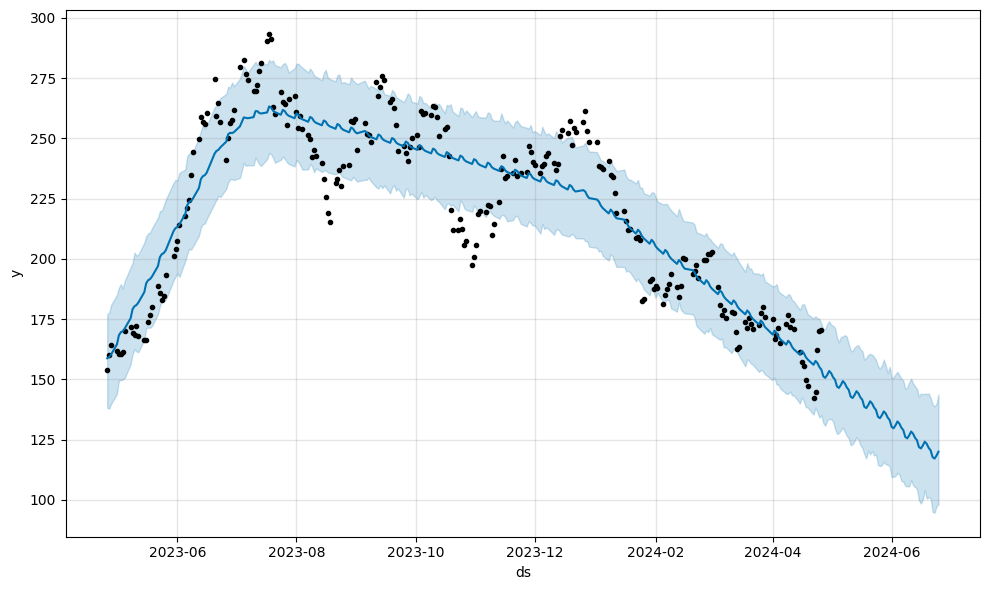

In [45]:
figure = m.plot(forecast, xlabel='ds', ylabel='y')

The black dots are the actual price of Tesla.The forecast price is the blue line.The shades are the upper and the lower limit of y prices.

As we can see a really great buying opportunity was on September, 2023 and November, 2023 because the actual price of Tesla was less than the predicted one.

We can also notice that from February 2024, the actual and the predicted price is very close, and the second one decreases almost linearly until June 2024. It's also a good opportunity to buy.

Some great opportunities to sell are at the end of July, 2023 and on January, 2024, because the actual prices are above the predicted ones.

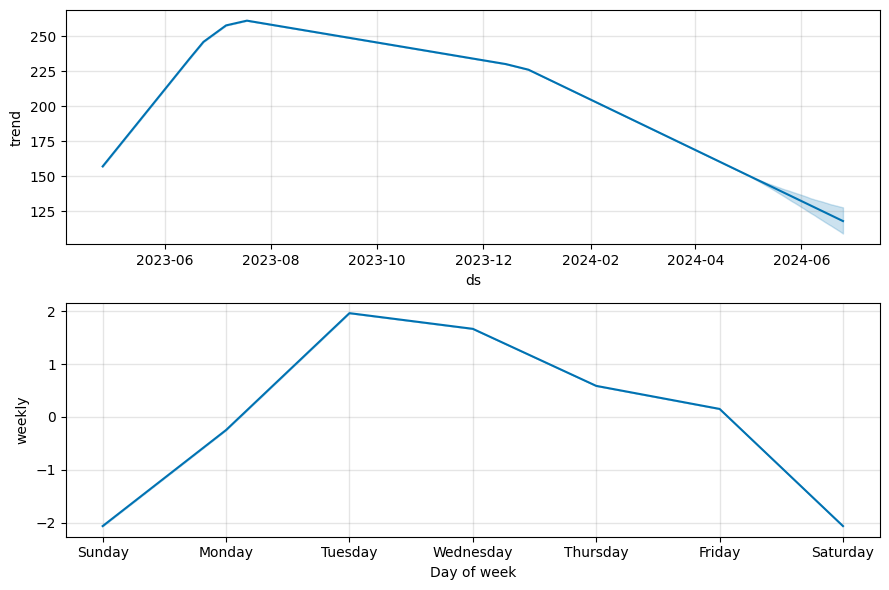

In [46]:
figure2 = m.plot_components(forecast)

##Downloading the Forecast data

In [47]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

For more information about Tesla stock price check out : https://finance.yahoo.com/quote/TSLA

The current price of Tesla is $168. It is $$2 less than yesterday, and it has dropped by almost 1%.